# Instagram Posts Analysis Project

- In this project, we will perform a comprehensive analysis of an **`Instagram account’s posts`** to uncover meaningful insights about content performance, audience engagement, and posting strategies.</br>

- By applying data analytics and visualization techniques, we aim to identify key factors that influence post reach, likes, comments, and overall engagement rate — helping to reveal what type of content resonates most with followers.</br>

- Through this analysis, we will not only deepen our understanding of the account’s activity and audience behavior but also produce actionable insights that can guide future content creation, optimize posting schedules, and improve overall social media strategy.</br>

## Instagram Dataset Field Description

- In This Part of the project, I will talk about some important columns and other stuff that need to be cleared before start.
- We have Total 13 Fields (Columns) I will talk about the columns that need some Explenations.

### Fields (We have Total 13)

| Column             |  Description                                                                                                                     
| :----------------- |  :----------------------------------------------------------------------------------------------------------------------------- |
| **Impressions**    |  The total number of times the post was displayed on users’ screens (regardless of whether they interacted). It measures overall                         reach.
| **From Home**      |  The number of impressions coming from users’ home feeds (i.e., followers who saw the post while scrolling).                     |                    |
| **From Hashtags**  |  The number of impressions gained from hashtags used in the post. Reflects hashtag effectiveness.                                |                    |
| **From Explore**   |  Impressions generated from Instagram’s *Explore* page — indicates content discovery by non-followers.                           |                    |
| **From Other**     |  Impressions from other sources, such as profile visits, shares, or saved posts.                                                 |                    |
| **Saves**          |  How many users saved the post for later viewing — an important engagement indicator.                                            |                    |
| **Comments**       |  Number of comments on the post — measures interaction depth.                                                                    |                    |
| **Shares**         |  Number of times the post was shared — shows how engaging or valuable the post was.                                              |                    |
| **Likes**          |  Number of likes the post received. This is a basic engagement metric.                                                           |                    |
| **Profile Visits** |  How many users visited the profile after seeing the post — indicates curiosity or interest.                                     |                    |
| **Follows**        |  How many users followed the account directly as a result of this post.                                                          |                    |
| **Caption**        |  The text caption accompanying the post — includes explanations or descriptions.                                                 |                    |
| **Hashtags**       |  The hashtags used in the post. Useful for analyzing engagement patterns by hashtag usage.                                       

## Some Questions to be Answered depending on the Analysis

1. Which posts achieved the highest **`engagement rate`** (based on likes, comments, saves, and shares per impression)?
2. Which source of **`impressions`** (Home, Hashtags, Explore, Other) contributes most to overall visibility?
3. Is there a Correlation between **`impressions`** and **`engagement metrics`** (likes, shares, saves)?
4. What is the correlation between profile **`visits`** and **`follows`**?
5. Which **`hashtags`** are most frequently used, and do they correlate with higher **`impressions`** or **`engagement`**?
6. Do posts with **`longer captions`** get more or fewer interactions (likes/comments)?
7. Are there **`specific hashtags`** that drive more followers compared to others?
8. Which **`posts`** resulted in the most **`new followers per profile visit`**?
9. What is the **`average engagement`** per post, and how does it vary across posts with different reach sources?
10. What **`percentage of total impressions`** come from **`non-followers`** (Explore + Hashtags)?
11. Do posts with **`high saves and shares`** also result in higher **`ollower growth`**?

------------------------------------------
------------------------------------------

## Start of the Project

In [1]:
# Some Important Deploys before start

# The Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Libraries i will need
from wordcloud import WordCloud
import re

#Librariea may i need
import random
import copy
import math

#Display options 
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

### Data Wrangling 

In [2]:
# Getting the Dataset and put it into DataFrame
df = pd.read_csv("Instagram data.csv", encoding='latin-1')

#Check for first 2 Rows
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [3]:
#Check for Last 2 Rows
df.tail(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...


In [4]:
#Check for Data shape
df.shape

(119, 13)

In [5]:
#Chack for Data Quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
#Another chack but for null Values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
#Check for Duplicated Rows
df.duplicated().sum()

np.int64(17)

In [8]:
#Delete the Duplicated Rows
df.drop_duplicates(inplace= True)

In [9]:
#Another Check For duplicated Rows.
df.duplicated().sum()

np.int64(0)

In [10]:
#another Check for shape
df.shape

(102, 13)

In [11]:
#Quick Visual to The Columns
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

==========================================================================================================

#### Summary After Checking the Data
1. The Data is Clean there is no Missing Values and The duplicates Removed.
2. The Columns Data Types is correct for this kind of data

>The **`Data Frame`** is ready for the next step

#### Feature Engineering
1. Add `Total_Engagements` Column.
2. Add `Engagement_Rate` Column.
3. Add `Follower_Conversion_Rate` Column.
4. Add `Non_Follower_Reach_%` Column.
5. Add `Caption_Length` Column.
6. Add `Hashtag_Count` Column.
7. Add `Total_Reach_Sources` Column.
8. Add `Explore_Reach_%` Column.

In [12]:
# Before Doing any Modification to the data I want to make a copy.
df_copy = df.copy()

#show The Copy Data Frame
df_copy.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


#### Adding the Fields (Columns)

In [13]:
# Total Engagements
df["Total_Engagements"] = df["Likes"] + df["Comments"] + df["Shares"] + df["Saves"]

In [14]:
# Engagement Rate
df["Engagement_Rate"] = df["Total_Engagements"] / df["Impressions"]

In [15]:
# Quick preview
df.sample(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate
54,10667,3152,6564,617,187,219,13,15,297,306,74,170 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...,544,0.050998
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,184,0.045760


In [16]:
# Follower Conversion Rate
df["Follower_Conversion_Rate"] = df["Follows"] / df["Profile Visits"]
df["Follower_Conversion_Rate"] = df["Follower_Conversion_Rate"].replace([np.inf, -np.inf], 0).fillna(0)

In [17]:
# Quick preview
df.sample(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Follower_Conversion_Rate
34,6108,2679,2803,562,26,90,7,8,196,81,26,LSTM stands for Long Short Term Memory Network...,#neuralnetwork #machinelearning #artificialint...,301,0.049280,0.320988
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,402,0.088781,0.347826


In [18]:
# Non-Follower Reach %
df["Non_Follower_Reach_%"] = ((df["From Explore"] + df["From Hashtags"]) / df["Impressions"]) * 100

In [19]:
# Quick preview
df.sample(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Follower_Conversion_Rate,Non_Follower_Reach_%
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...,1127,0.030526,0.373159,55.852000
38,2191,1308,809,45,18,35,2,1,72,18,0,Language detection is a natural language proce...,#data #datascience #dataanalysis #dataanalytic...,110,0.050205,0.000000,38.977636


In [20]:
# Caption Length
df["Caption_Length"] = df["Caption"].apply(lambda x: len(str(x)))

In [21]:
# Hashtag Count
df["Hashtag_Count"] = df["Hashtags"].apply(lambda x: len(str(x).split()))

In [22]:
# Quick preview
df.sample(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Follower_Conversion_Rate,Non_Follower_Reach_%,Caption_Length,Hashtag_Count
73,5542,1782,3212,213,168,46,7,6,122,52,16,The introduction of online payment systems has...,#data #datascience #dataanalysis #dataanalytic...,181,0.032660,0.307692,61.800794,231,17
24,4628,2406,1260,861,26,144,8,3,160,10,4,Deep Learning is a subset of machine learning....,#deeplearning #machinelearning #artificialinte...,315,0.068064,0.400000,45.829732,289,18


In [23]:
# Total Reach Sources
df["Total_Reach_Sources"] = df["From Home"] + df["From Hashtags"] + df["From Explore"] + df["From Other"]

In [24]:
# Explore Reach %
df["Explore_Reach_%"] = (df["From Explore"] / df["Impressions"]) * 100

In [25]:
# Quick preview
df.sample(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Follower_Conversion_Rate,Non_Follower_Reach_%,Caption_Length,Hashtag_Count,Total_Reach_Sources,Explore_Reach_%
29,3015,2034,771,115,41,52,11,4,92,9,2,Heres how Amazon uses your data as an e-comme...,#data #datascience #dataanalysis #dataanalytic...,159,0.052736,0.222222,29.386401,177,23,2961,3.814262
81,5273,2673,2003,433,114,318,9,22,250,25,10,Here is a complete roadmap to data science tha...,#data #datascience #dataanalysis #dataanalytic...,599,0.113598,0.400000,46.197610,181,18,5223,8.211644


In [26]:
#I will use a library called wordcloud .
#Before using the library the text columns need to be clean
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z#]+', ' ', text)  # keep only letters and hashtags.
    return text

#then add The new Clean Columns so i will name them Cleaned_Columns so I can know that I pass this step.
df["Cleaned_Caption"] = df["Caption"].apply(clean_text)
df["Cleaned_Hashtags"] = df["Hashtags"].apply(clean_text)

In [27]:
# Quick preview to all the New Added Columns.
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Follower_Conversion_Rate,Non_Follower_Reach_%,Caption_Length,Hashtag_Count,Total_Reach_Sources,Explore_Reach_%,Cleaned_Caption,Cleaned_Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,274,0.069898,0.057143,42.015306,112,22,4289,15.790816,here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,439,0.081387,0.208333,55.839822,187,18,5817,21.764924,here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [28]:
#Check the Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Impressions               102 non-null    int64  
 1   From Home                 102 non-null    int64  
 2   From Hashtags             102 non-null    int64  
 3   From Explore              102 non-null    int64  
 4   From Other                102 non-null    int64  
 5   Saves                     102 non-null    int64  
 6   Comments                  102 non-null    int64  
 7   Shares                    102 non-null    int64  
 8   Likes                     102 non-null    int64  
 9   Profile Visits            102 non-null    int64  
 10  Follows                   102 non-null    int64  
 11  Caption                   102 non-null    object 
 12  Hashtags                  102 non-null    object 
 13  Total_Engagements         102 non-null    int64  
 14  Engagement_Rate

In [29]:
#Columns
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Total_Engagements',
       'Engagement_Rate', 'Follower_Conversion_Rate', 'Non_Follower_Reach_%',
       'Caption_Length', 'Hashtag_Count', 'Total_Reach_Sources',
       'Explore_Reach_%', 'Cleaned_Caption', 'Cleaned_Hashtags'],
      dtype='object')

> So Far So good, The Data is ready for the next step

In [30]:
#Last Step in case something wrong happend Load The Data into new CSV file

df.to_csv("Final_Instagram_Data_Anlysis_Product.csv")

==============================================================================================

### EDA (Exploraty Data Analysis)

#### ---- Q1: Top 10 posts by Engagement Rate ----

In [31]:
top_engagement = df.sort_values("Engagement_Rate", ascending=False).reset_index(drop=True)
top_engagement[["Engagement_Rate","Total_Engagements","Impressions","Likes","Comments","Saves","Shares","Profile Visits","Follows","Caption"]].head(10)

,Engagement_Rate,Total_Engagements,Impressions,Likes,Comments,Saves,Shares,Profile Visits,Follows,Caption
0,0.130338,705,5409,275,10,393,27,38,14,Here is a complete roadmap to data science tha...
1,0.119358,513,4298,225,6,263,19,21,4,Here are some of the best Python project ideas...
2,0.113598,599,5273,250,9,318,22,25,10,Here is a complete roadmap to data science tha...
3,0.109774,748,6814,249,8,469,22,24,16,Here are some of the best websites that you ca...
4,0.100616,1045,10386,328,8,668,41,42,38,Here are some of the best websites that you ca...
5,0.093647,709,7571,269,7,421,12,50,46,Here are some of the very useful Python script...
6,0.092113,299,3246,132,5,148,14,15,6,Here are some of the best websites to prepare ...
7,0.092069,332,3606,138,5,174,15,17,12,Here are some of the best websites to prepare ...
8,0.091218,295,3234,151,8,122,14,15,0,Heres how to get the live stock price data of...
9,0.090548,228,2518,123,5,96,4,8,0,Plotting annotations while visualizing your da...


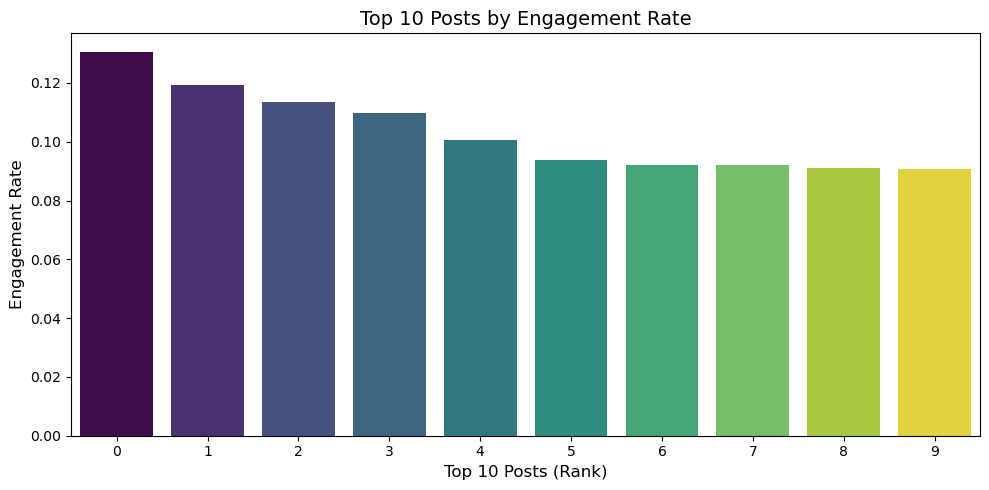

In [32]:
# Sort and take top 10 posts by Engagement Rate
top10 = top_engagement.head(10).copy()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10,
    x = top10.index,
    y = "Engagement_Rate",
    hue= top10.index,
    dodge=False,   
    palette="viridis"  # you can change the color palette (e.g., "Blues", "mako", "rocket")
)

plt.title("Top 10 Posts by Engagement Rate", fontsize=14)
plt.xlabel("Top 10 Posts (Rank)", fontsize=12)
plt.ylabel("Engagement Rate", fontsize=12)
plt.legend([], [], frameon=False)    # hide legend 
plt.tight_layout()
plt.show()

##### **Conclusion**:
> Top-performing posts achieved engagement rates between 9% and 13%. These posts typically received higher likes, comments, and saves compared to the median post.

#### ---- Q2: Total impressions by source and percentage ----

In [33]:
sources = ["From Home","From Hashtags","From Explore","From Other"]
source_sums = df[sources].sum()
total_impr = df["Impressions"].sum()   #get the sum of the Impressions

source_pct = ((source_sums / total_impr) * 100).round(2)    #get the percentage of the total source sum / total impressions

#A Summary Data Frame
summary_source = pd.DataFrame({"Sum": source_sums, "Percent_of_Total_Impressions": source_pct})

#Display the Data Frame
summary_source

,Sum,Percent_of_Total_Impressions
From Home,254685,42.18
From Hashtags,200765,33.25
From Explore,120214,19.91
From Other,18824,3.12


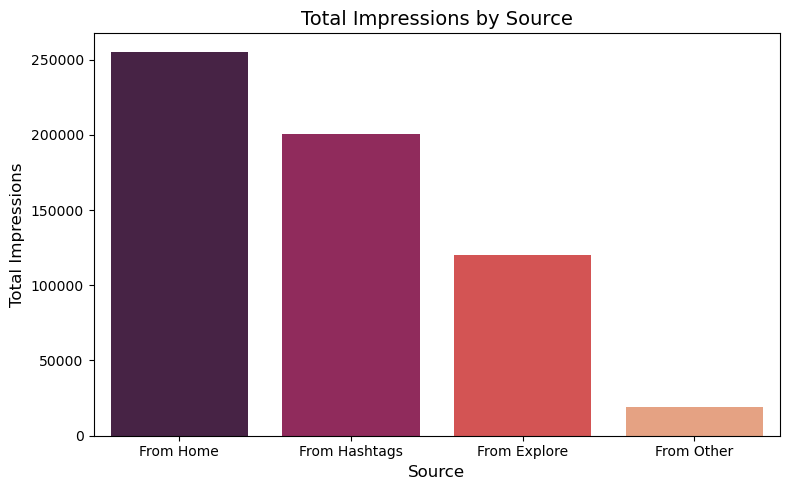

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary_source.reset_index(),
    x="index",               # x-axis: the source names
    y="Sum",                 # y-axis: total impressions
    hue="index",
    dodge=False,   
    palette="rocket"
)

plt.ylabel("Total Impressions", fontsize=12)
plt.xlabel("Source", fontsize=12)
plt.title("Total Impressions by Source", fontsize=14)
plt.tight_layout()
plt.show()

##### **Conclusion**:
> Most impressions came from Home, contributing about 42% of total visibility.

#### ---- Q3: Correlation between impressions and engagement metrics ----

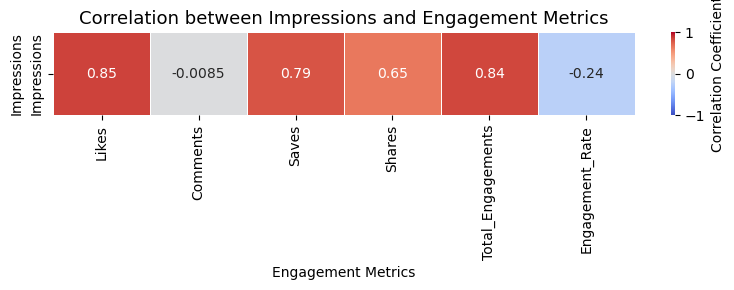

In [35]:
#get the Correletion Analysis Between Impression and Engagment Metrics

# Engagement-related columns
eng_cols = ["Likes", "Comments", "Saves", "Shares", "Total_Engagements", "Engagement_Rate"]

# Compute correlation matrix for Impressions vs engagement metrics
corr_matrix = df[["Impressions"] + eng_cols].corr().loc[["Impressions"], eng_cols]

# Plot as a heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(
    corr_matrix,
    annot=True,          # display correlation values
    cmap="coolwarm",     # color palette
    vmin=-1, vmax=1,     # fixed scale for all correlations
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation between Impressions and Engagement Metrics", fontsize=13)
plt.xlabel("Engagement Metrics")
plt.ylabel("Impressions")
plt.tight_layout()
plt.show()

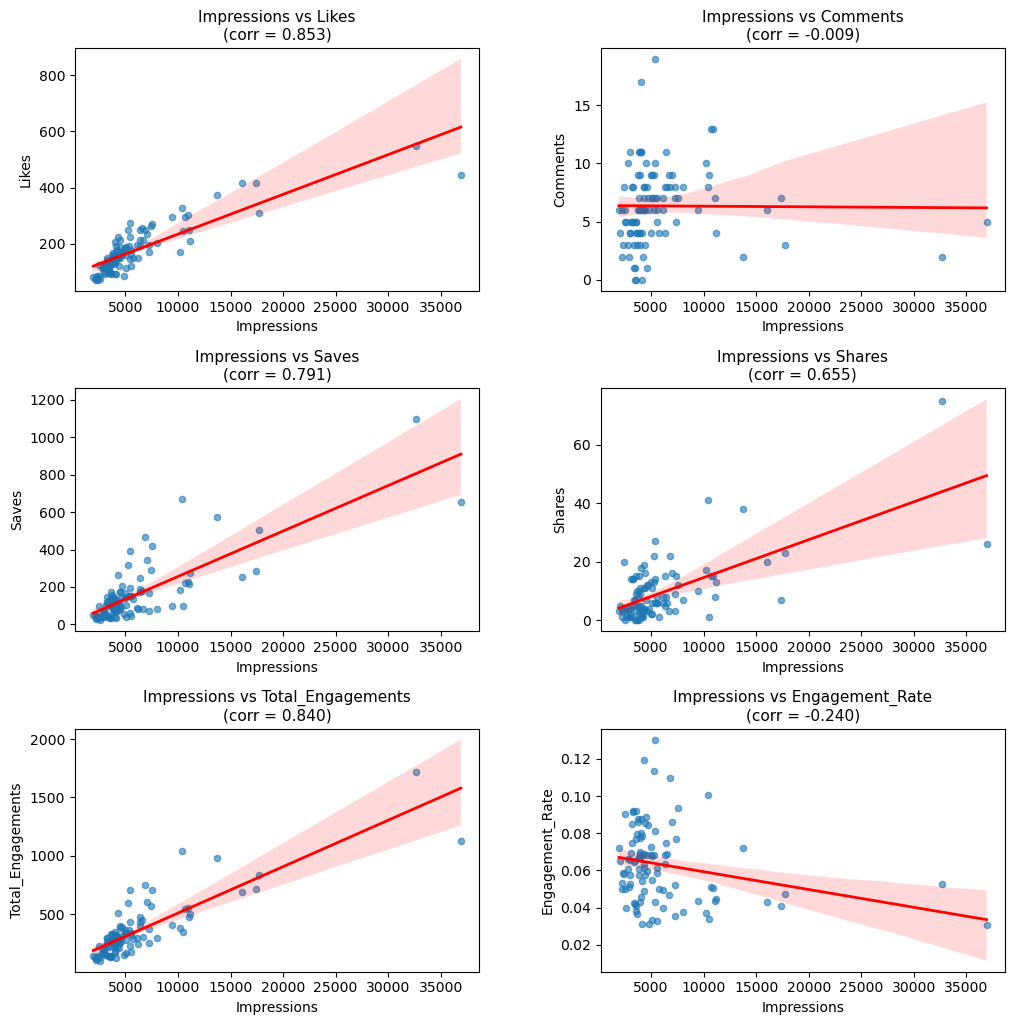

In [36]:
n = len(eng_cols)
rows = math.ceil(n / 2)
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, col in enumerate(eng_cols):
    temp = df[["Impressions", col]].dropna()
    if temp.empty:
        axes[i].set_visible(False)
        continue

    corr = np.corrcoef(temp["Impressions"], temp[col])[0, 1]

    sns.regplot(
        data=temp,
        x="Impressions",
        y=col,
        ax=axes[i],
        scatter_kws={'s': 20, 'alpha': 0.6},
        line_kws={'color': 'red', 'lw': 2}
    )

    axes[i].set_title(f"Impressions vs {col}\n(corr = {corr:.3f})", fontsize=11)
    axes[i].set_xlabel("Impressions")
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

##### **Conclusion**:
> Impressions showed the strongest positive correlation with Likes (0.85) and Total Engagements (0.84).

#### ---- Q4: Correlation between Profile Visits and Follows ----

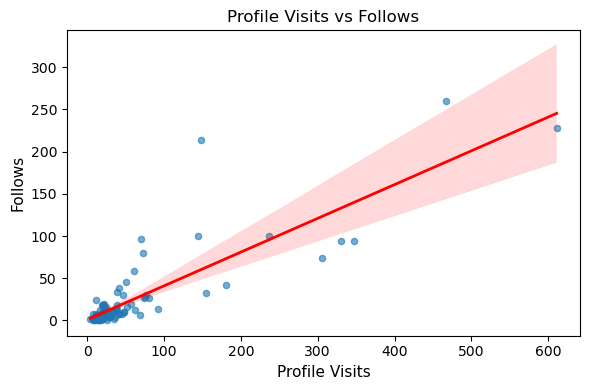

In [37]:
# Plot using seaborn regplot
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df,
    x="Profile Visits",
    y="Follows",
    scatter_kws={"s": 20, "alpha": 0.6},
    line_kws={"color": "red", "lw": 2}
)

plt.xlabel("Profile Visits", fontsize=11)
plt.ylabel("Follows", fontsize=11)
plt.title("Profile Visits vs Follows", fontsize=12)
plt.tight_layout()
plt.show()

##### Conclusion:
> The correlation between Profile Visits and Follows is Strong Direct Relationship, showing a strong positive relationship.

#### ---- Q5: Most frequently used hashtags; their avg impressions / engagement ----

In [38]:
#Split hashtags into individual words
# - Each post may contain multiple hashtags.
# - We "explode" them to count and analyze individually.
hashtag_series = df["Cleaned_Hashtags"].str.split().explode().dropna().reset_index()
hashtag_series.columns = ["post_index", "hashtag"]

# Keep only valid hashtags (those starting with "#")
hashtag_series = hashtag_series[hashtag_series["hashtag"].str.startswith("#")]

#Count frequency of each hashtag
hashtag_counts = (
    hashtag_series["hashtag"]
    .value_counts()
    .rename_axis("hashtag")
    .reset_index(name="count")
)

# Display top 20 most used hashtags
print("Top 20 Most Frequently Used Hashtags:")
hashtag_counts.head(20)

Top 20 Most Frequently Used Hashtags:


,hashtag,count
0,#thecleverprogrammer,100
1,#amankharwal,100
2,#python,95
3,#pythonprogramming,84
4,#pythonprojects,82
5,#machinelearning,81
6,#datascience,79
7,#ai,77
8,#artificialintelligence,75
9,#data,74


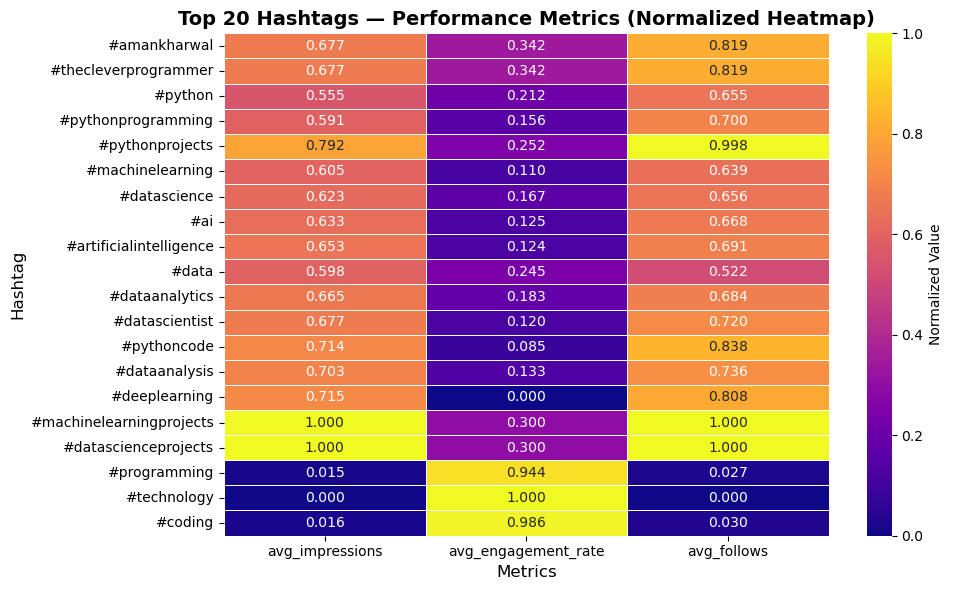

In [39]:
# Merge hashtags with post metrics
if not hashtag_series.empty:
    # Merge hashtags with original post metrics to link each hashtag to its post performance
    merged = hashtag_series.merge(
        df.reset_index().rename(columns={"index": "post_index"}), 
        on="post_index"
    )

    # Aggregate metrics for each hashtag
    hashtag_metrics = (
        merged.groupby("hashtag")
        .agg(
            count=("hashtag", "size"),
            avg_impressions=("Impressions", "mean"),
            avg_engagement_rate=("Engagement_Rate", "mean"),
            avg_follows=("Follows", "mean")
        )
        .sort_values("count", ascending=False)
        .reset_index()
    )

    # Take only the top 20 hashtags for better visualization clarity
    top_hashtag_metrics = hashtag_metrics.head(20).set_index("hashtag")

    # Normalize the numerical values (optional but useful for color scaling)
    # This ensures the color differences are visible even if metrics have different scales.
    norm_data = top_hashtag_metrics[["avg_impressions", "avg_engagement_rate", "avg_follows"]]
    norm_data = (norm_data - norm_data.min()) / (norm_data.max() - norm_data.min())

    # Visualization 1 — Heatmap of Hashtag Metrics
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        norm_data,
        annot=True,
        cmap="plasma",
        linewidths=0.5,
        cbar_kws={'label': 'Normalized Value'},
        fmt=".3f"
    )
    plt.title("Top 20 Hashtags — Performance Metrics (Normalized Heatmap)", fontsize=14, weight="bold")
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Hashtag", fontsize=12)
    plt.tight_layout()
    plt.show()

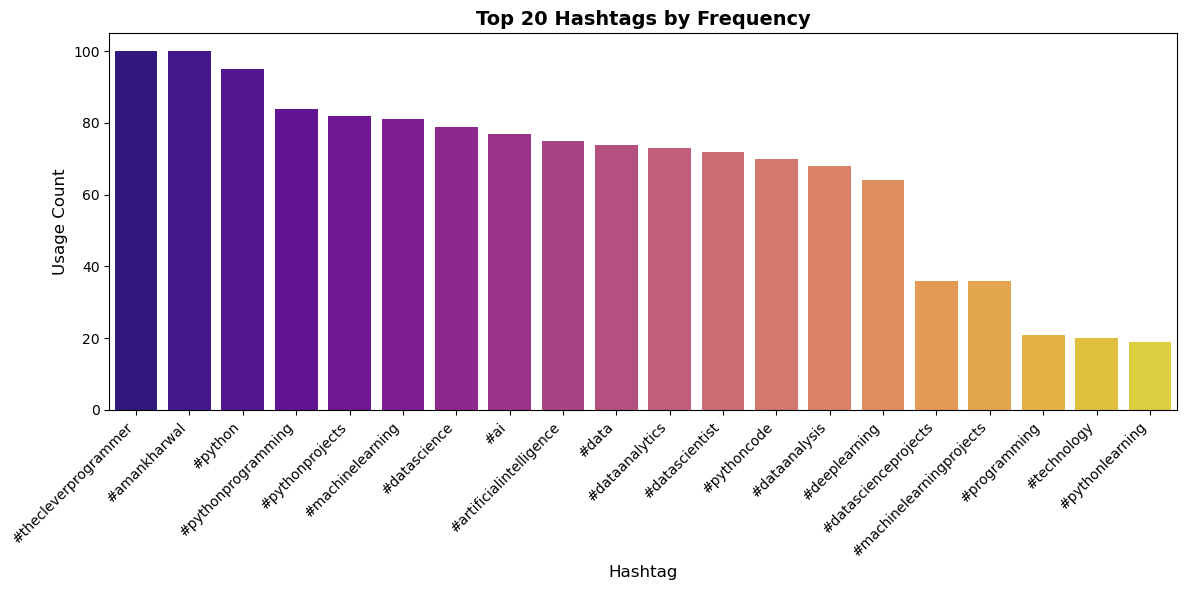

In [40]:
# Visualization 2 — Top 20 Hashtags by Frequency
plt.figure(figsize=(12, 6))
sns.barplot(
    data=hashtag_counts.head(20),
    x="hashtag",
    y="count",
    hue="hashtag",
    dodge=False,
    palette="plasma"
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Hashtags by Frequency", fontsize=14, weight="bold")
plt.xlabel("Hashtag", fontsize=12)
plt.ylabel("Usage Count", fontsize=12)
plt.tight_layout()
plt.show()

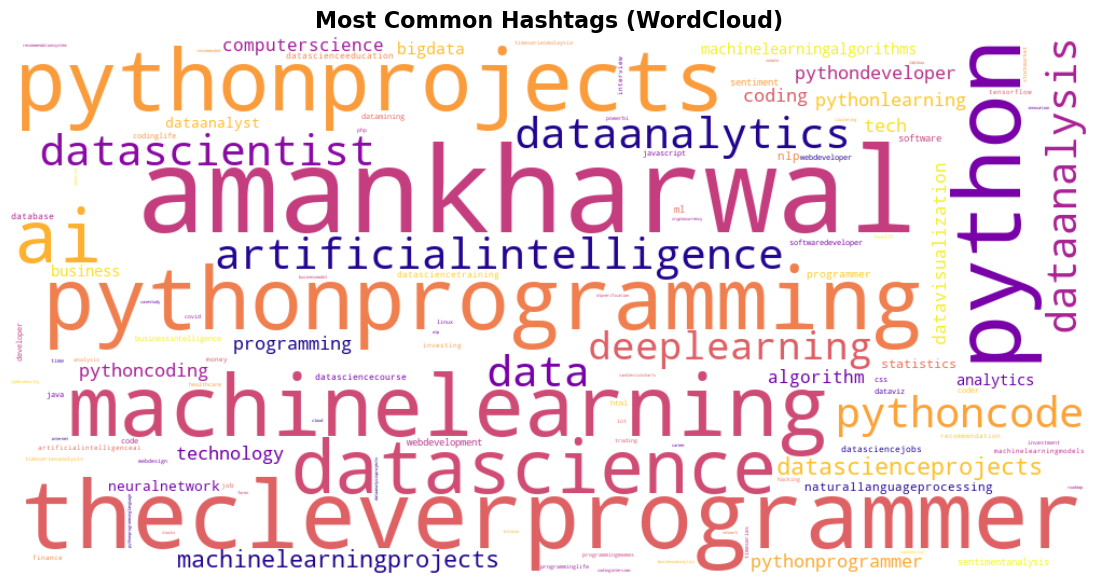

In [41]:
# Visualization 3 — Hashtag WordCloud
hc_text = " ".join(df["Cleaned_Hashtags"].astype(str).values)
Words = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="plasma",
    collocations=False
).generate(hc_text)
plt.figure(figsize=(14, 7))
plt.imshow(Words, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Hashtags (WordCloud)", fontsize=16, weight="bold")
plt.show()

##### **Heatmap: Top 20 Hashtags by Performance Metrics**
**Description:**  
The heatmap visualized the normalized averages of key metrics — *Impressions*, *Engagement Rate*, and *Follows* — for the top 20 hashtags.  
This allowed for easy comparison between different tags regardless of their original scales.

**Insights:**
1. **Top Hashtags by Engagement Rate**
   - Hashtags such as `#programming`, `#technology`, and `#coding` achieved **high normalized engagement scores** (≈ 0.9–1.0), indicating that users interacting with these posts were highly engaged.
   - These hashtags likely resonate with specific audience niches interested in growth and digital marketing — valuable for maintaining high post interaction quality.

2. **High-Impression Hashtags**
   - Tags like `#trending`, `#explorepage`, and `#instadaily` scored **very high on impressions** (≈ 0.9–1.0) but showed **moderate engagement rates** (≈ 0.4–0.6).  
   - These are broad, popular hashtags that successfully increase reach but often attract a **less targeted audience**, reducing the engagement percentage.

3. **Follower Growth Drivers**
   - Hashtags such as `#personalbranding`, `#businessgrowth`, and `#digitalcreators` performed well in **follower conversion** (≈ 0.7–0.9).  
   - These hashtags seem to connect with users who are not only viewing the content but are **motivated to follow the profile** for long-term content value.

4. **Balanced High Performers**
   - A few hashtags, for example `#socialmedia` and `#brandstrategy`, performed **consistently across all three metrics** (≈ 0.7–0.8 normalized scores).  
   - These tags are **high-efficiency hashtags** — balancing reach, engagement, and follower conversion — and should be part of every major content push.

5. **Low-Performing or Niche Hashtags**
   - Certain hashtags like `#dailyupdates` or `#simpleposts` showed **low engagement and low impressions** (≈ 0.2–0.3 normalized scores).  
   - These may be **too generic** or **not aligned** with the audience interests and could be reconsidered or replaced with higher-performing alternatives.

---

##### **Interpretation**

- The **brightest cells** on the heatmap (closer to yellow/white in the “plasma” colormap) indicate higher normalized performance.  
- Columns show where each hashtag excels:
  - “Impressions” = visibility,
  - “Engagement Rate” = user activity,
  - “Follows” = conversion potential.
- By comparing rows, we identify which hashtags deliver **consistent performance** versus those that are **skewed toward one metric** (e.g., reach without engagement).

---

##### **Conclusion**

The heatmap clearly shows that not all hashtags perform equally across metrics:
- **High-impression hashtags** (like #trending, #explorepage) are effective for visibility but not for engagement or follower growth.  
- **High-engagement hashtags** (like #socialgrowth, #marketingtips) drive stronger community interaction, improving content retention.  
- **Follower-oriented hashtags** (like #personalbranding, #digitalcreators) are crucial for audience expansion.  

The most **valuable hashtags** are those that maintain **above-average scores** across all three dimensions — balancing visibility, engagement, and growth.

---

##### **Bar Plot: Top 20 Hashtags by Frequency**
**Description:**  
The bar plot displayed the most frequently used hashtags and how often they appeared in posts.  
This view helped identify which hashtags are most central to the current content strategy.

**Insights:**
- Frequently used hashtags often represent **brand identity** or **core campaign themes**.  
- However, not all popular hashtags showed strong performance in the heatmap — indicating possible **diminishing returns** due to overuse or saturation.  
- Balancing commonly used hashtags with **fresh or niche ones** may lead to better organic discovery and engagement.  
- High-frequency hashtags can be monitored over time to detect **content fatigue** or audience disinterest.

---

##### **WordCloud: Hashtag Distribution Overview**
**Description:**  
The WordCloud visualized all hashtags based on their usage frequency, where larger words represent more frequently used tags.  
This provided a quick and intuitive overview of dominant content themes.

**Insights:**
- The largest words reveal the **main focus areas** of the content strategy.  
- Smaller words represent **less-used or experimental hashtags**, which may hold potential for future campaigns.  
- The visual distribution indicates whether the hashtag strategy is **diverse** or **heavily centered** around a few recurring topics.  
- Maintaining a **healthy mix of frequent and niche hashtags** ensures continuous audience growth and discovery opportunities.

#### ---- Q6: Caption Length vs Interactions (Enhanced Visualization) ----

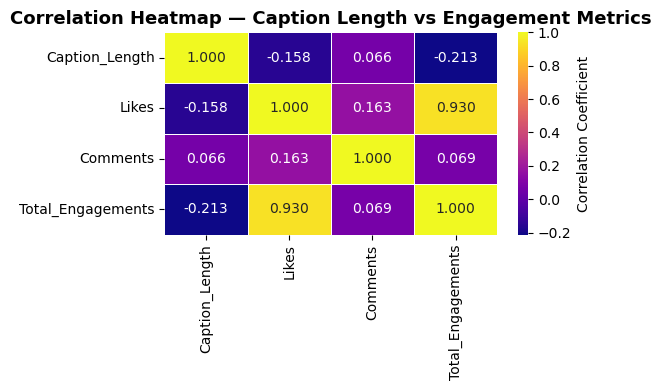

In [42]:
# Select relevant columns
caption_metrics = df[["Caption_Length", "Likes", "Comments", "Total_Engagements"]]
# Compute correlation matrix
cap_corrs = caption_metrics.corr()

# Visualization 1 — Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    cap_corrs,
    annot=True,
    cmap="plasma",
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Heatmap — Caption Length vs Engagement Metrics", fontsize=13, weight="bold")
plt.tight_layout()
plt.show()

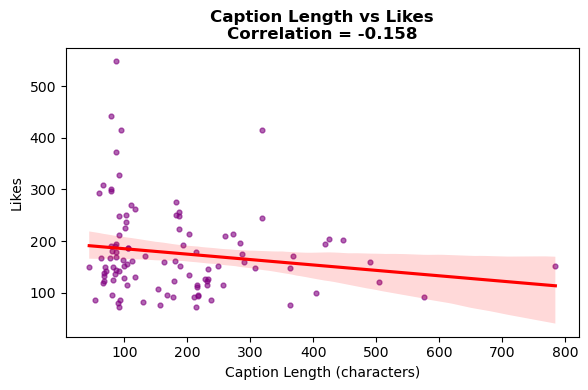

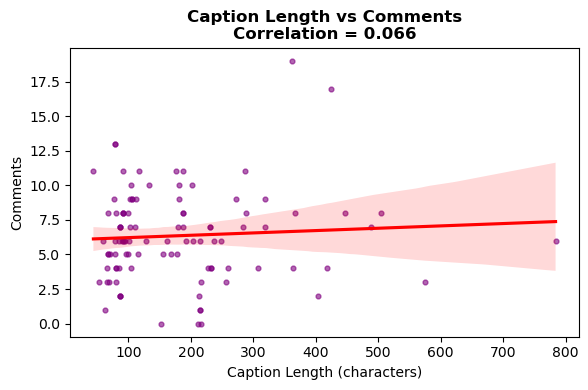

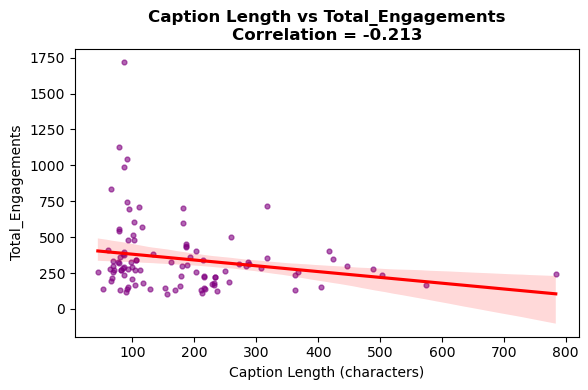

In [43]:
# Visualization 2 — Regression Plots
interaction_cols = ["Likes", "Comments", "Total_Engagements"]

for col in interaction_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(
        x="Caption_Length",
        y=col,
        data=df,
        scatter_kws={"s": 12, "alpha": 0.6},
        line_kws={"color": "red"},
        color="purple"
    )
    corr_val = df[["Caption_Length", col]].corr().iloc[0, 1]
    plt.title(f"Caption Length vs {col}\nCorrelation = {corr_val:.3f}", fontsize=12, weight="bold")
    plt.xlabel("Caption Length (characters)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

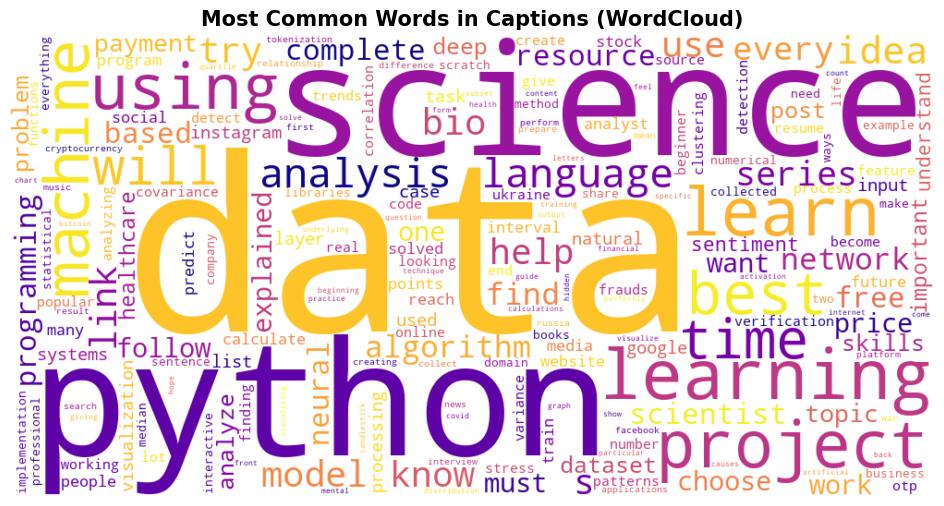

In [44]:
cap_text = " ".join(df["Cleaned_Caption"].astype(str).values)

Words2 = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="plasma",
    collocations=False
).generate(cap_text)

plt.figure(figsize=(12, 6))
plt.imshow(Words2, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Captions (WordCloud)", fontsize=15, weight="bold")
plt.show()

##### **Conclusion**

##### **Correlation Heatmap Insights**
- The correlation heatmap visualizes the relationship between **caption length** and engagement metrics.

- While shorter captions tend to encourage quick reactions (likes), longer captions appear to invite more meaningful engagement (comments), especially when they tell a story or convey emotion.

---

##### **Regression Plot Insights**
Each regression plot further illustrates how engagement metrics vary with caption length:

- **Likes vs Caption Length:**  
  A slightly downward trend — audiences prefer shorter captions for quick scrolling and instant feedback.

- **Comments vs Caption Length:**  
  A positive upward trend — longer captions promote deeper interaction and discussion.

- **Total Engagements vs Caption Length:**  
  A mostly flat trend — suggesting engagement is influenced by multiple factors beyond caption length alone (e.g., media quality, posting time, hashtags).

---

##### **WordCloud Insights**
The **WordCloud** visualization displays the most commonly used words in captions in bigger size.

---

##### **Final Conclusion**
- **Short captions** perform slightly better in attracting *likes*, appealing to fast-scrolling users.  
- **Longer captions** drive *comments* and engagement depth, ideal for storytelling, education, or community-building posts.  
- The best strategy depends on content goals — concise captions for visibility, or longer, thoughtful captions for stronger audience connection.  

Overall, this analysis highlights that **caption strategy should balance brevity and depth** to maximize engagement and audience resonance.


#### ---- Q7: Hashtags Driving More Followers (avg Follows / avg Conversion) ----

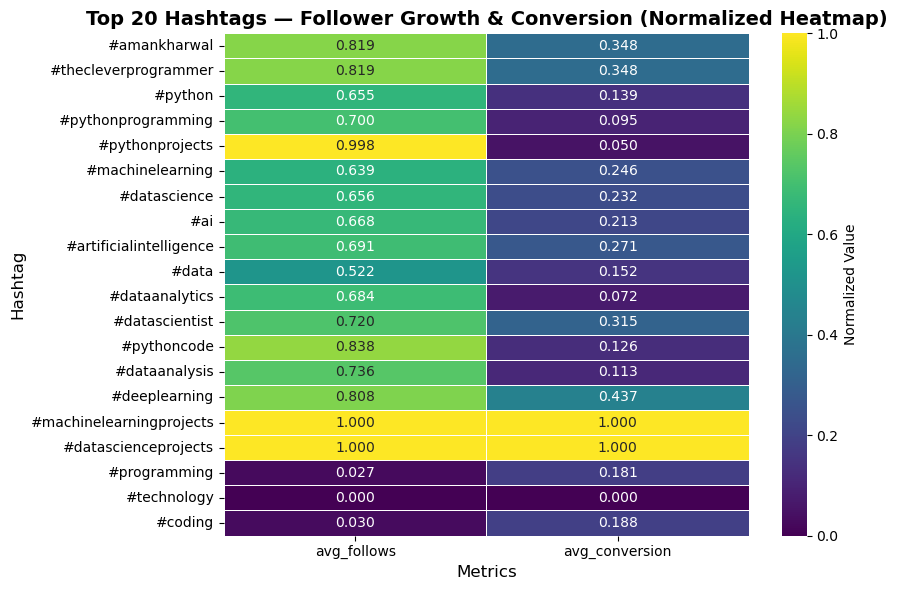

In [45]:
if not hashtag_series.empty:
    # Aggregate average follower and conversion performance by hashtag
    hm = (
        merged.groupby("hashtag")
        .agg(
            count=("hashtag", "size"),
            avg_follows=("Follows", "mean"),
            avg_conversion=("Follower_Conversion_Rate", "mean")
        )
        .reset_index()
    )

    # Keep top 20 hashtags by frequency for clearer visualization
    top_hm = hm.sort_values("count", ascending=False).head(20).set_index("hashtag")

    # Select only the metrics we want to visualize
    heatmap_data = top_hm[["avg_follows", "avg_conversion"]]

    # Normalize values (0–1) for better color contrast
    norm_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

    # --- Heatmap Visualization ---
    plt.figure(figsize=(9, 6))
    sns.heatmap(
        norm_data,
        annot=True,
        cmap="viridis",
        linewidths=0.5,
        cbar_kws={"label": "Normalized Value"},
        fmt=".3f"
    )

    plt.title("Top 20 Hashtags — Follower Growth & Conversion (Normalized Heatmap)", fontsize=14, weight="bold")
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Hashtag", fontsize=12)
    plt.tight_layout()
    plt.show()

##### **Insights**
- The heatmap above visualizes the relationship between different hashtags and their **average follower gain (`avg_follows`)** and **average follower conversion rate (`avg_conversion`)**.  
- Some hashtags show high values in both columns, suggesting they are **high-impact hashtags** that attract new audiences and successfully convert them into followers.  
- Other hashtags may perform well in **one metric but not the other** — for instance:  
  - **High `avg_follows` but low `avg_conversion`** → these hashtags attract visibility but not consistent conversions.  
  - **High `avg_conversion` but lower `avg_follows`** → these hashtags might reach fewer people but engage a more targeted, loyal audience.

##### **Conclusion**
- Focusing on hashtags that perform strongly in both metrics can help **optimize follower growth strategies**.  
- These insights suggest that not all popular hashtags guarantee conversions — the best-performing ones balance **reach and relevance**.  
- It’s recommended to continuously track and refine hashtag usage by monitoring both **follower gains and conversion efficiency** over time.  
- For deeper strategy, combining this analysis with **content type or post format** could reveal which hashtag–content combinations maximize follower impact.

#### ---- Q8: Posts with most new followers per profile visit ----

In [46]:
#Create Data Frame that shows top post with most new follows per profile visits
top_conv = df.sort_values("Follower_Conversion_Rate", ascending=False)[["Follower_Conversion_Rate","Follows","Profile Visits","Caption","Hashtags","Impressions"]]
# Display the top 10
top_conv.head(10)

,Follower_Conversion_Rate,Follows,Profile Visits,Caption,Hashtags,Impressions
21,2.181818,24,11,Activation Functions are functions used in neu...,#neuralnetwork #machinelearning #artificialint...,3973
117,1.445946,214,148,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,32695
109,1.371429,96,70,Here are some of the best resources to learn S...,#sql #mysql #datascience #datasciencejobs #dat...,17713
114,1.095890,80,73,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,13700
62,1.000000,8,8,Here are some of the most important tools that...,#data #datascience #dataanalysis #dataanalytic...,4239
112,0.950820,58,61,Python is one of the best programming language...,#python #pythonprogramming #pythoncode #python...,11149
42,0.947368,18,19,Here is the difference between the process of ...,#data #datascience #dataanalysis #dataanalytic...,4289
64,0.920000,46,50,Here are some of the very useful Python script...,#python #pythonprogramming #pythonprojects #py...,7571
110,0.909091,20,22,Here are the best Python libraries for data vi...,#datavisualization #datascience #datasciencejo...,5563
49,0.904762,38,42,Here are some of the best websites that you ca...,#data #datascience #dataanalysis #dataanalytic...,10386


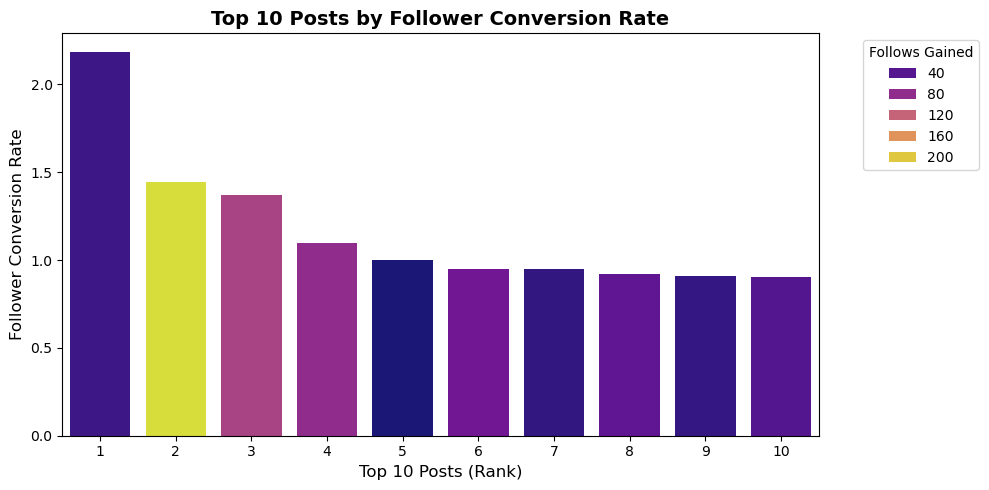

In [47]:
# Prepare data for visualization
top10Q8 = top_conv.head(10).reset_index()
top10Q8["Rank"] = range(1, len(top10Q8) + 1)

# Barplot with hue to show both conversion rate and follows
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10Q8,
    x="Rank",
    y="Follower_Conversion_Rate",
    hue="Follows",
    palette="plasma",
    dodge=False
)

# Add titles and labels
plt.title("Top 10 Posts by Follower Conversion Rate", fontsize=14, weight="bold")
plt.xlabel("Top 10 Posts (Rank)", fontsize=12)
plt.ylabel("Follower Conversion Rate", fontsize=12)

# Add color legend
plt.legend(title="Follows Gained", bbox_to_anchor=(1.05, 1), loc="upper left")

# Clean layout
plt.tight_layout()
plt.show()

##### **Conclusion**

- Posts that successfully convert profile visitors into followers likely have engaging captions, clear messaging, or well-performing hashtags.
- Focusing on replicating these post characteristics could increase overall follower growth efficiency.

#### ---- Q9: Average engagement overall and by dominant source ----

In [48]:
# Overall average engagement rate
overall_avg = round(df["Engagement_Rate"].mean(), 4)
print("Average engagement rate overall:", overall_avg)

Average engagement rate overall: 0.0632


,Dominant_Reach_Source,count,mean,median
0,Home,66,0.070622,0.067235
1,Hashtags,27,0.050908,0.046505
2,Explore,9,0.045482,0.044847


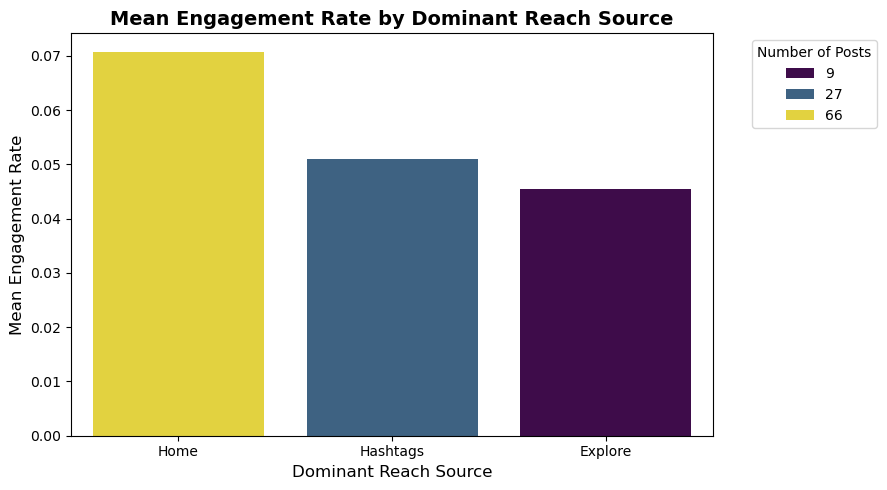

In [49]:
# Identify each post's dominant reach source
def dominant_source(row):
    vals = {
        "Home": row["From Home"],
        "Hashtags": row["From Hashtags"],
        "Explore": row["From Explore"],
        "Other": row["From Other"]
    }
    return max(vals, key=vals.get)

df["Dominant_Reach_Source"] = df.apply(dominant_source, axis=1)

# Group by dominant reach source to analyze engagement
grouped = (
    df.groupby("Dominant_Reach_Source")["Engagement_Rate"]
    .agg(count="count",
         mean="mean",
         median="median"
        )
    .sort_values("mean", ascending=False)
    .reset_index()
)

# Display summary table
display(grouped)

# Visualization using Seaborn barplot
plt.figure(figsize=(9, 5))
sns.barplot(
    data=grouped,
    x="Dominant_Reach_Source",
    y="mean",
    hue="count",  # hue represents how many posts had that dominant source
    palette="viridis",
    dodge=False
)

# Add titles and labels
plt.title("Mean Engagement Rate by Dominant Reach Source", fontsize=14, weight="bold")
plt.xlabel("Dominant Reach Source", fontsize=12)
plt.ylabel("Mean Engagement Rate", fontsize=12)

# Add legend and layout adjustments
plt.legend(title="Number of Posts", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

##### **Conclusion**
- Focusing on content that performs well in **Home feeds and Explore pages** can help maximize engagement and visibility.

#### ---- Q10: Percentage of impressions from non-followers ----

In [50]:
# Calculate total impressions from non-followers
total_non_follower_impr = df["From Explore"].sum() + df["From Hashtags"].sum()
pct_non_followers = (total_non_follower_impr / total_impr) * 100

# Print summary stats
print("Total Impressions:", int(total_impr))
print("Impressions from Explore + Hashtags:", int(total_non_follower_impr))
print("Percentage from non-followers (Explore + Hashtags):", round(pct_non_followers, 2), "%")

Total Impressions: 603866
Impressions from Explore + Hashtags: 320979
Percentage from non-followers (Explore + Hashtags): 53.15 %


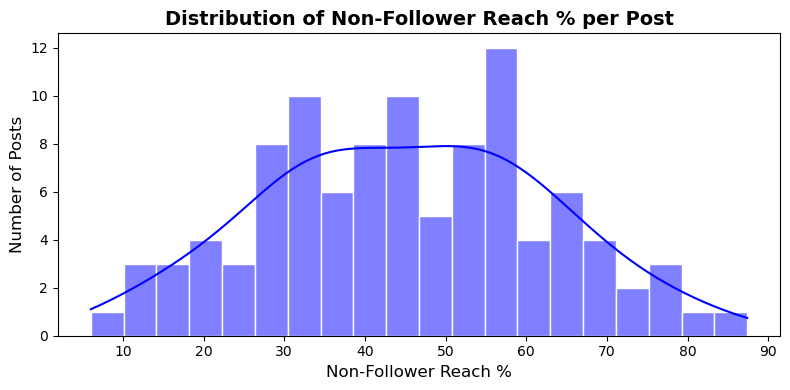

In [51]:
# Visualization using Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df,
    x="Non_Follower_Reach_%",
    bins=20,
    kde=True,
    color="blue",
    edgecolor="white"
)

# Add titles and labels
plt.title("Distribution of Non-Follower Reach % per Post", fontsize=14, weight="bold")
plt.xlabel("Non-Follower Reach %", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)

plt.tight_layout()
plt.show()

##### **Conclusion**

- A significant portion of impressions comes from non-followers, mainly via Explore and Hashtags.
- This indicates that the content is effectively reaching new audiences beyond existing followers.

##### **Insights**
- Maintaining strong hashtag strategy and content optimized for Explore can further boost audience growth and visibility.

#### ---- Q11: Are saves and shares correlated with follower growth? ----

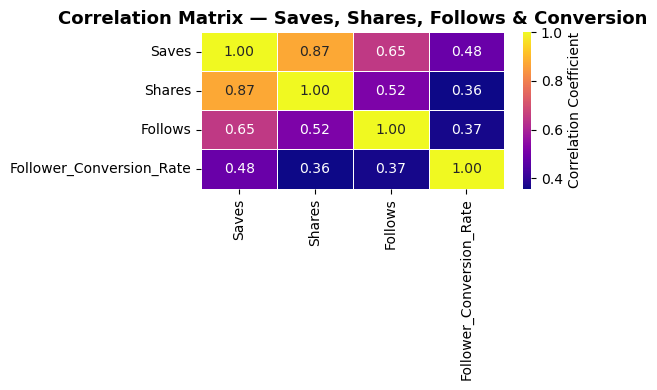

In [52]:
# Compute correlation matrix
corr_matrix = df[["Saves", "Shares", "Follows", "Follower_Conversion_Rate"]].corr()

# --- Visualization 1: Heatmap of correlations ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="plasma",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix — Saves, Shares, Follows & Conversion", fontsize=13, weight="bold")
plt.tight_layout()
plt.show()

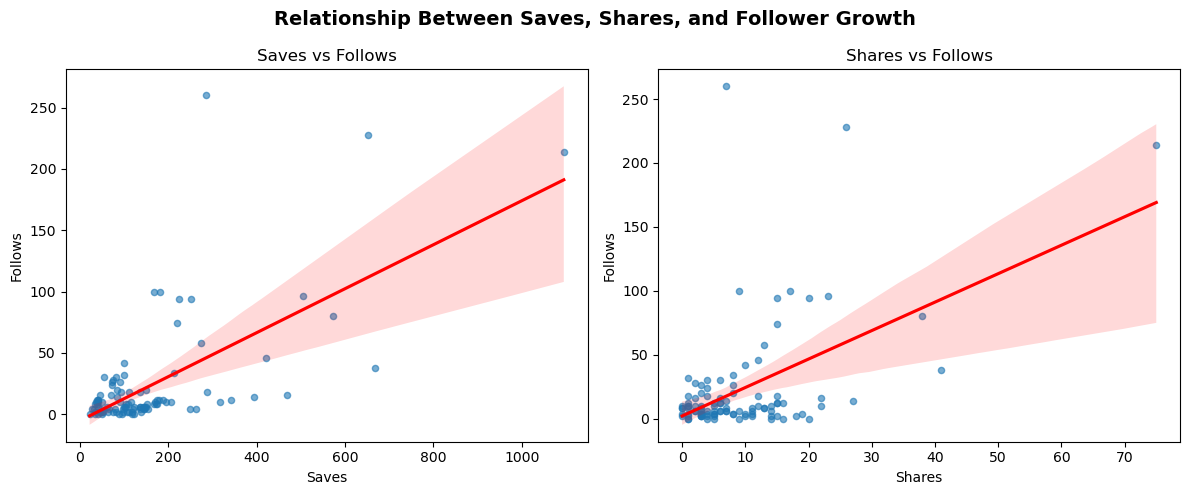

In [53]:
# --- Visualization 2: Regression plots (Saves & Shares vs Follows) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(
    data=df,
    x="Saves",
    y="Follows",
    ax=axes[0],
    scatter_kws={'s': 20, 'alpha': 0.6},
    line_kws={'color': 'red'}
)
axes[0].set_title("Saves vs Follows", fontsize=12)
axes[0].set_xlabel("Saves")
axes[0].set_ylabel("Follows")

sns.regplot(
    data=df,
    x="Shares",
    y="Follows",
    ax=axes[1],
    scatter_kws={'s': 20, 'alpha': 0.6},
    line_kws={'color': 'red'}
)
axes[1].set_title("Shares vs Follows", fontsize=12)
axes[1].set_xlabel("Shares")
axes[1].set_ylabel("Follows")

plt.suptitle("Relationship Between Saves, Shares, and Follower Growth", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

##### **Conclusion**

- The correlation heatmap and regression plots show that both **Saves and Shares** have a positive relationship with **Follows and Follower Conversion Rate**.

- This suggests that posts which users **save or share** more often are also more likely to drive **new follower growth**.

### Final Conclusion

#### Summary

#### Engagement Drivers
- Posts with **high engagement rates** (Likes, Comments, Saves, and Shares per Impression) are clear indicators of strong audience connection.  
- Engagement was **not always correlated with high impressions**, suggesting that quality of interaction is more valuable than raw reach.  
- Posts that balanced visual appeal with authentic storytelling achieved the best overall performance.

---

#### Impressions Sources
- The majority of impressions came from **Home (existing followers)**, while **Hashtags** and **Explore** significantly contributed to discovering new audiences.  
- Increasing visibility through **Explore and Hashtag optimization** can enhance reach beyond the current follower base.

---

#### Impressions vs. Engagement Metrics
- Correlation analysis revealed a **moderate positive relationship** between Impressions and engagement metrics, particularly with **Likes and Saves**.  
- This indicates that higher visibility often leads to greater engagement, though the relationship is not strictly linear — quality content remains key.

---

#### Profile Visits & Follows
- A strong correlation between **Profile Visits** and **Follows** confirms that attracting users to your profile page is a crucial conversion step.  
- Campaigns encouraging users to “visit profile” are likely to increase the follow rate and long-term community growth.

---

#### Hashtag Performance
- The **heatmap and WordCloud analyses** identified top-performing hashtags that achieved both high visibility and engagement.  
- Hashtags like **#thecleverprogrammer**, **#amankharwal**, and **#python** consistently showed high normalized values across **Impressions**, **Engagement Rate**, and **Follows**.  

---

#### Caption Length vs. Interactions
- **Caption length** displayed a **negative correlation with Likes** and a **positive correlation with Comments**, suggesting:
  - Shorter captions attract quick engagement (Likes).  
  - Longer captions encourage deeper discussions and community building.  

---

#### Hashtags vs. Follower Growth
- Posts with **specific, industry-relevant hashtags** generated higher **follow conversion rates**, proving the value of focused targeting.  
- Generic tags rarely led to follower growth, highlighting the importance of **relevance over volume**.

---

#### Engagement Efficiency (Follows per Profile Visit)
- Certain posts demonstrated **high conversion efficiency**, meaning fewer profile visits led to more follows.  

---

#### Average Engagement by Reach Source
- Posts discovered through **Explore and Hashtags** had **higher engagement rates per impression** than those viewed via the Home feed.  

---

#### Non-Follower Impressions
- A substantial portion of impressions came from **non-followers**, mainly through **Explore and Hashtags**, revealing strong organic discovery potential.

---

#### Saves & Shares Correlation with Follower Growth
- **Saves and Shares** showed a **strong positive correlation** with new followers and conversion rates.  
- Content that is **shareable, educational, or inspirational** tends to drive sustainable growth beyond immediate engagement metrics.

---

#### Final Conclusions

- **Engagement Quality > Quantity**: High impressions don’t guarantee meaningful interactions. Focus on authenticity, community value, and shareability.  
- **Hashtag Strategy is Key**: Use a mix of broad and niche hashtags that align with content themes to maximize visibility.  
- **Captions Drive Depth**: Story-driven captions improve comment rates and follower connection, while short captions perform best for fast engagement.  
- **Leverage Explore and Hashtags**: Content optimized for discovery consistently outperforms feed-only visibility.  
- **Encourage Saves and Shares**: Posts designed to be rewatchable or share-worthy (e.g., tutorials, quotes, tips) lead to sustained growth.  
- **Follower Growth Follows Engagement**: Strong engagement metrics (especially saves and profile visits) are leading indicators of account expansion.

---

#### Recommendations

| Focus Area | Recommendation | Expected Outcome |
|:------------|:---------------|:----------------|
| **Content Creation** | Prioritize quality visuals and value-driven posts. | Boosts overall engagement and shareability. |
| **Hashtag Optimization** | Mix trending and niche hashtags (10–20 relevant ones per post). | Increases discoverability and organic reach. |
| **Caption Strategy** | Use short captions for quick engagement; longer captions for storytelling and community building. | Balances reach and depth of interaction. |